# This script was used to see how electrodes correlate across subjects. See another from: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006769
#


In [1]:
from gesture.utils import get_epoch
import scipy.io
from gesture.config import *
import h5py
import pandas as pd

2024-07-18 21:32:16 - Start Program

pre_all: Running from CMD.


In [2]:
filename=meta_dir+'ele_anat_position_info.npy'
ele = np.load(filename,allow_pickle='TRUE').item()

In [3]:
sid=2
fs=1000
selected_channels=False
# 4 extra channels: [2*emg + 1*trigger_indexes + 1*emg_trigger]
#test_epochs, val_epochs, train_epochs, scaler=read_data_split_function(sid, fs, selected_channels=selected_channels,scaler='std',EMG=True)
epochs=get_epoch(sid, fs,scaler='no',EMG=True,tmin=-4,tmax=5)
epoch1=epochs['0']# 20 trials. 8001 time points per trial for 8s.
epoch2=epochs['1']
epoch3=epochs['2']
epoch4=epochs['3']
epoch5=epochs['4']

In [7]:
epoch=epoch1.copy().load_data().filter(l_freq=3,h_freq=9,picks=['seeg'])

matrixes=[]
for tmin in np.arange(-4,5,1):
    data=epoch.get_data(picks=['seeg'],tmin=tmin,tmax=tmin+1)
    ch_number=data.shape[1]
    for trial in data: # trial: (115, 1000)
        dataframe=pd.DataFrame(data=trial.transpose(),columns=[str(i) for i in range(ch_number)])
        matrix = dataframe.corr(method='pearson')
        matrixes.append(matrix)
matrix_avg=np.average(np.asarray(matrixes),axis=0)

In [ ]:
%matplotlib qt
%gui qt
#epoch1.plot(n_epochs=5, n_channels=5, scalings=dict(seeg=3))

### This is sid 2 

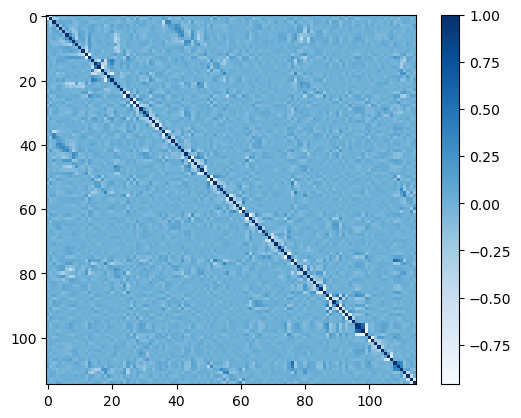

In [5]:
%matplotlib inline
#%matplotlib qt
#%gui qt
plt.imshow(matrix_avg, cmap='Blues')
plt.colorbar()
#variables=ele['sid2']['ana_label_id']
#plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
#plt.yticks(range(len(matrix)), variables)
plt.show()

### This is sid 3  (without re-reference)

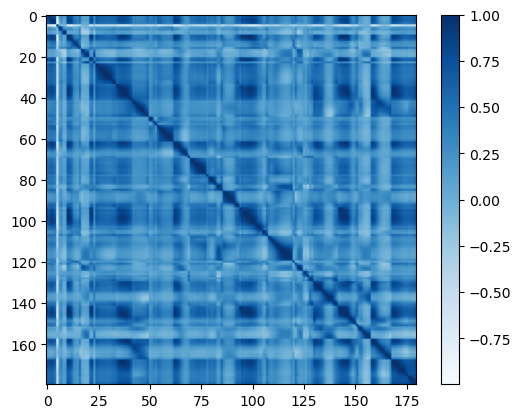

In [8]:
%matplotlib inline
#%matplotlib qt
#%gui qt
plt.imshow(matrix_avg, cmap='Blues')
plt.colorbar()
#variables=ele['sid3']['ana_label_id']
#plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
#plt.yticks(range(len(matrix)), variables)
plt.show()

### This is sid 4

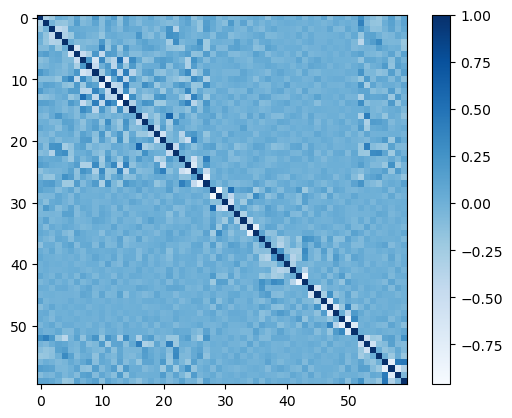

In [12]:
%matplotlib inline
#%matplotlib qt
#%gui qt
plt.imshow(matrix_avg, cmap='Blues')
plt.colorbar()
#variables=ele['sid3']['ana_label_id']
#plt.xticks(range(len(matrix)), variables, rotation=90, ha='right')
#plt.yticks(range(len(matrix)), variables)
plt.show()